<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="45%" align="right" border="4">

# Mean-Variance Portfolio Class

Without doubt, the Markowitz (1952) **mean-variance portfolio theory** is a cornerstone of modern financial theory. This section illustrates the use of the `mean_variance_portfolio` class to implement this approach.

In [1]:
from dx import *
import seaborn as sns; sns.set()

## Market Environment and Portfolio Object

We start by instantiating a `market environment` object which in particular contains a list of **ticker symbols** in which we are interested in.

In [2]:
ma = market_environment('ma', dt.date(2010, 1, 1))
ma.add_list('symbols', ['AAPL', 'GOOG', 'MSFT', 'FB'])
ma.add_constant('source', 'google')
ma.add_constant('final date', dt.date(2014, 3, 1))

Using pandas under the hood, the class **retrieves historial stock price data** from either Yahoo! Finance of Google.

In [3]:
%%time
port = mean_variance_portfolio('am_tech_stocks', ma)
  # instantiates the portfolio class
  # and retrieves all the time series data needed

CPU times: user 370 ms, sys: 10.5 ms, total: 380 ms
Wall time: 1.96 s


## Basic Statistics

Since no **portfolio weights** have been provided, the class defaults to equal weights.

In [4]:
port.get_weights()
  # defaults to equal weights

{'AAPL': 0.25, 'FB': 0.25, 'GOOG': 0.25, 'MSFT': 0.25}

Given these weights you can calculate the **portfolio return** via the method `get_portfolio_return`.

In [5]:
port.get_portfolio_return()
  # expected (= historical mean) return

0.19012032495905895

Analogously, you can call `get_portfolio_variance` to get the historical **portfolio variance**.

In [6]:
port.get_portfolio_variance()
  # expected (= historical) variance

0.04314587977503051

The class also has a neatly printable `string` representation.

In [8]:
print(port)
  # ret. con. is "return contribution"
  # given the mean return and the weight
  # of the security

Portfolio am_tech_stocks 
--------------------------
return            0.190
volatility        0.208
Sharpe ratio      0.915

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.250 |     0.054 
GOOG   |  0.250 |     0.040 
MSFT   |  0.250 |     0.013 
FB     |  0.250 |     0.083 



## Setting Weights

Via the method `set_weights` the weights of the single portfolio components can be adjusted.

In [9]:
port.set_weights([0.6, 0.2, 0.1, 0.1])

In [10]:
print port

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-10-045782a48424>, line 1)

You cal also easily **check results for different weights** with changing the attribute values of an object.

In [11]:
port.test_weights([0.6, 0.2, 0.1, 0.1])
    # returns av. return + vol + Sharp ratio
    # without setting new weights

array([ 0.20064395,  0.21644491,  0.92699775])

Let us implement a **Monte Carlo simulation** over potential portfolio weights.

In [12]:
# Monte Carlo simulation of portfolio compositions
rets = []
vols = []

for w in range(500):
    weights = np.random.random(4)
    weights /= sum(weights)
    r, v, sr = port.test_weights(weights)
    rets.append(r)
    vols.append(v)

rets = np.array(rets)
vols = np.array(vols)

And the simulation results **visualized**.

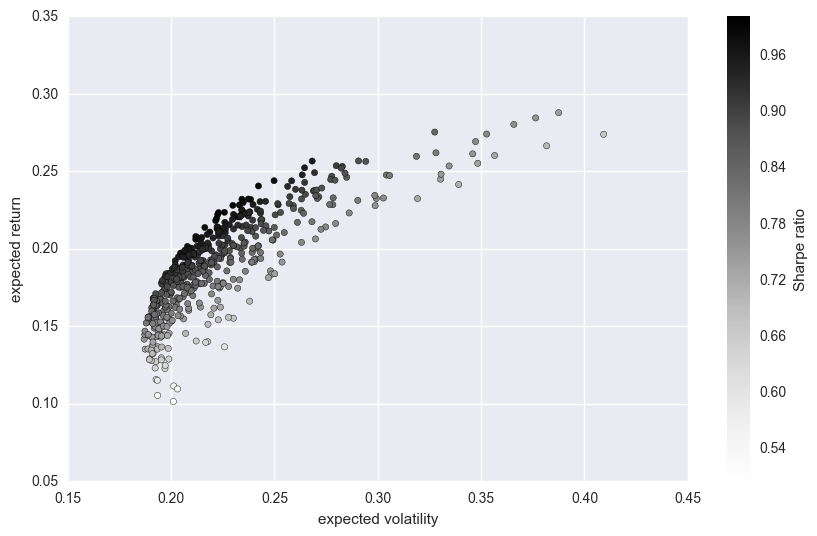

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(vols, rets, c=rets / vols, marker='o')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

## Optimizing Portfolio Composition

One of the major application areas of the mean-variance portfolio theory and therewith of this DX Analytics class it the **optimization of the portfolio composition**. Different target functions can be used to this end.

### Return

The first target function might be the **portfolio return**.

In [14]:
port.optimize('Return')
  # maximizes expected return of portfolio
  # no volatility constraint

In [16]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.332
volatility        0.523
Sharpe ratio      0.635

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.000 |     0.000 
GOOG   |  0.000 |     0.000 
MSFT   |  0.000 |     0.000 
FB     |  1.000 |     0.332 



Instead of maximizing the portfolio return without any constraints, you can also set a (sensible/possible) **maximum target volatility** level as a constraint. Both, in an **exact sense** ("equality constraint") ...

In [17]:
port.optimize('Return', constraint=0.225, constraint_type='Exact')
  # interpretes volatility constraint as equality

In [19]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.226
volatility        0.225
Sharpe ratio      1.005

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.481 |     0.104 
GOOG   |  0.294 |     0.047 
MSFT   |  0.000 |     0.000 
FB     |  0.225 |     0.075 



... or just a an **upper bound** ("inequality constraint").

In [20]:
port.optimize('Return', constraint=0.4, constraint_type='Bound')
  # interpretes volatility constraint as inequality (upper bound)

In [22]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.302
volatility        0.400
Sharpe ratio      0.756

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.258 |     0.056 
GOOG   |  0.000 |     0.000 
MSFT   |  0.000 |     0.000 
FB     |  0.742 |     0.246 



### Risk

The class also allows you to minimize **portfolio risk**.

In [23]:
port.optimize('Vol')
  # minimizes expected volatility of portfolio
  # no return constraint

In [25]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.140
volatility        0.187
Sharpe ratio      0.747

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.211 |     0.046 
GOOG   |  0.248 |     0.040 
MSFT   |  0.448 |     0.023 
FB     |  0.093 |     0.031 



And, as before, to set **constraints** (in this case) for the target return level.

In [26]:
port.optimize('Vol', constraint=0.175, constraint_type='Exact')
  # interpretes return constraint as equality

In [27]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.175
volatility        0.194
Sharpe ratio      0.904

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.318 |     0.069 
GOOG   |  0.282 |     0.045 
MSFT   |  0.256 |     0.013 
FB     |  0.143 |     0.048 



In [28]:
port.optimize('Vol', constraint=0.20, constraint_type='Bound')
  # interpretes return constraint as inequality (upper bound)

In [29]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.200
volatility        0.206
Sharpe ratio      0.970

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.397 |     0.086 
GOOG   |  0.301 |     0.048 
MSFT   |  0.123 |     0.006 
FB     |  0.179 |     0.059 



### Sharpe Ratio

Often, the target of the portfolio optimization efforts is the so called **Sharpe ratio**. The `mean_variance_portfolio` class of DX Analytics assumes a **risk-free rate of zero** in this context.

In [30]:
port.optimize('Sharpe')
  # maximize Sharpe ratio

In [32]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.229
volatility        0.228
Sharpe ratio      1.006

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.493 |     0.107 
GOOG   |  0.268 |     0.043 
MSFT   |  0.000 |     0.000 
FB     |  0.238 |     0.079 



## Efficient Frontier

Another application area is to derive the **efficient frontier** in the mean-variance space. These are all these portfolios for which there is **no portfolio with both lower risk and higher return**. The method `get_efficient_frontier` yields the desired results.

In [33]:
%%time
evols, erets = port.get_efficient_frontier(100)
  # 100 points of the effient frontier

CPU times: user 3.07 s, sys: 4.67 ms, total: 3.08 s
Wall time: 3.08 s


The plot with the **random and efficient portfolios**.

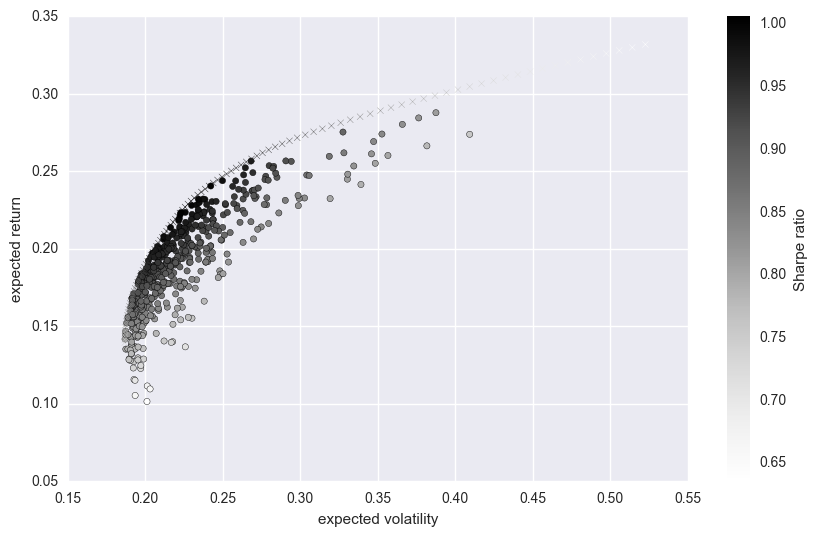

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(vols, rets, c=rets / vols, marker='o')
plt.scatter(evols, erets, c=erets / evols, marker='x')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

## Capital Market Line

The **capital market line** is another key element of the mean-variance portfolio approach representing all those risk-return combinations (in mean-variance space) that are possible to form from a **risk-less money market account** and **the market portfolio** (or another appropriate substitute efficient portfolio).

In [35]:
%%time
cml, optv, optr = port.get_capital_market_line(riskless_asset=0.05)
  # capital market line for effiecient frontier and risk-less short rate

CPU times: user 3 s, sys: 5.15 ms, total: 3 s
Wall time: 3.01 s


In [36]:
cml  # lambda function for capital market line

<function dx.portfolio.mean_variance_portfolio.get_capital_market_line.<locals>.<lambda>>

The following plot illustrates that the capital market line has an ordinate value equal to the **risk-free rate** (the safe return of the money market account) and is tangent to the **efficient frontier**.

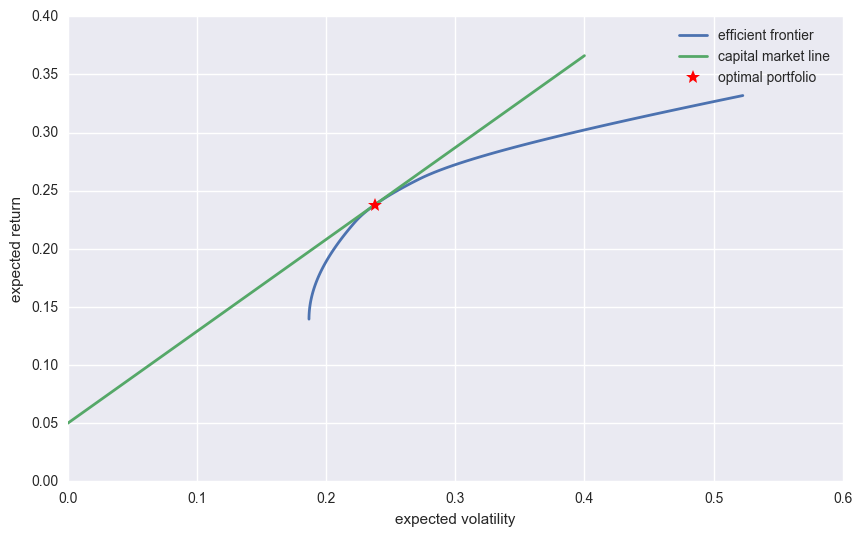

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(evols, erets, lw=2.0, label='efficient frontier')
plt.plot((0, 0.4), (cml(0), cml(0.4)), lw=2.0, label='capital market line')
plt.plot(optv, optr, 'r*', markersize=10, label='optimal portfolio')
plt.legend(loc=0)
plt.ylim(0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')

Portfolio return and risk of the efficient portfolio used are:

In [38]:
optr

0.23779804830709705

In [39]:
optv

0.2375878629201245

The **portfolio composition** can be derived as follows.

In [40]:
port.optimize('Vol', constraint=optr, constraint_type='Exact')

In [41]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.238
volatility        0.238
Sharpe ratio      1.001

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.532 |     0.116 
GOOG   |  0.192 |     0.031 
MSFT   |  0.000 |     0.000 
FB     |  0.276 |     0.091 



Or also in this way.

In [42]:
port.optimize('Return', constraint=optv, constraint_type='Exact')

In [43]:
print(port)

Portfolio am_tech_stocks 
--------------------------
return            0.238
volatility        0.238
Sharpe ratio      1.001

Positions
symbol | weight | ret. con. 
--------------------------- 
AAPL   |  0.531 |     0.115 
GOOG   |  0.193 |     0.031 
MSFT   |  0.000 |     0.000 
FB     |  0.276 |     0.092 



## Dow Jones Industrial Average

As a larger, more realistic example, consider **all symbols of the Dow Jones Industrial Average 30 index**.

In [44]:
symbols = ['AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
    'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'T', 'TRV', 'UNH', 'UTX',
    'V', 'VZ','WMT', 'XOM']
  # all DJIA 30 symbols

In [45]:
ma = market_environment('ma', dt.date(2010, 1, 1))
ma.add_list('symbols', symbols)
ma.add_constant('source', 'google')
ma.add_constant('final date', dt.date(2014, 3, 1))

**Data retrieval** in this case takes a bit.

In [46]:
%%time
djia = mean_variance_portfolio('djia', ma)
  # defining the portfolio and retrieving the data

Can not find data for source google and symbol DIS.
Will try other source.
Can not find data for source google and symbol MMM.
Will try other source.
CPU times: user 2.83 s, sys: 75.6 ms, total: 2.91 s
Wall time: 16 s


In [48]:
%%time
djia.optimize('Vol')
print(djia.variance, djia.variance ** 0.5)
  # minimium variance & volatility in decimals

0.00868912330702 0.0932154671019
CPU times: user 241 ms, sys: 1.95 ms, total: 243 ms
Wall time: 242 ms


Given the larger data set now used, **efficient frontier** ...

In [49]:
%%time
evols, erets = djia.get_efficient_frontier(25)
  # efficient frontier of DJIA

CPU times: user 14.6 s, sys: 78.9 ms, total: 14.6 s
Wall time: 14.7 s


... and **capital market line** derivations take also longer.

In [50]:
%%time
cml, optv, optr = djia.get_capital_market_line(riskless_asset=0.01)
  # capital market line and optimal (tangent) portfolio

CPU times: user 45.9 s, sys: 322 ms, total: 46.2 s
Wall time: 46.3 s


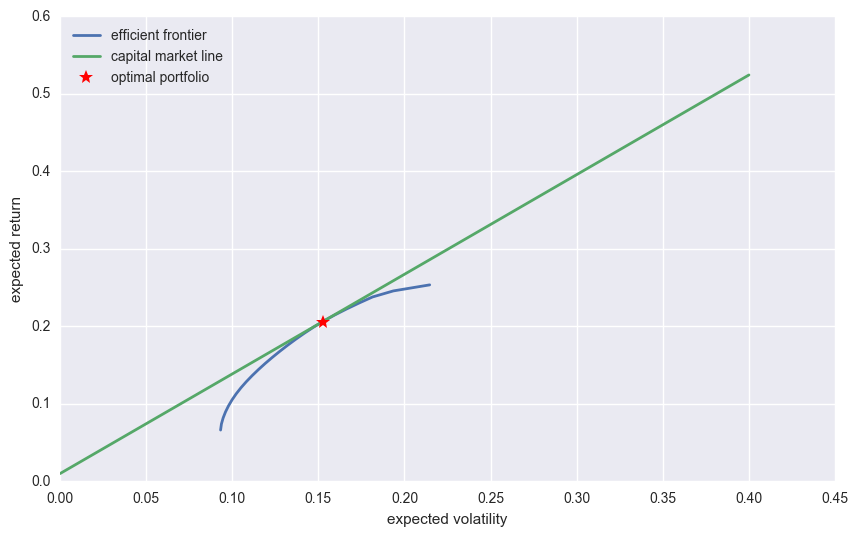

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(evols, erets, lw=2.0, label='efficient frontier')
plt.plot((0, 0.4), (cml(0), cml(0.4)), lw=2.0, label='capital market line')
plt.plot(optv, optr, 'r*', markersize=10, label='optimal portfolio')
plt.legend(loc=0)
plt.ylim(0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')

**Copyright, License & Disclaimer**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

DX Analytics (the "dx library") is licensed under the GNU Affero General Public License
version 3 or later (see [http://www.gnu.org/licenses/](http://www.gnu.org/licenses/)).

DX Analytics comes with no representations
or warranties, to the extent permitted by applicable law.


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

[http://tpq.io](http://tpq.io) | [team@tpq.io](mailto:team@tpq.io) | [http://twitter.com/dyjh](http://twitter.com/dyjh)

**Quant Platform** |
[http://quant-platform.com](http://quant-platform.com)

**Derivatives Analytics with Python (Wiley Finance)** |
[http://derivatives-analytics-with-python.com](http://derivatives-analytics-with-python.com)

**Python for Finance (O'Reilly)** |
[http://python-for-finance.com](http://python-for-finance.com)